# Basic Introduction to image processing

In this part of the workshop, we will talk about how to deal with 2-d data: mainly images, and then go through some introduction to CNNs.

## How a computer sees an image

As we know, images are comprised of a set of pixels that represent colors. One of the most common ways to represent an image is with an RGB matrix:

<p><a href="https://commons.wikimedia.org/wiki/File:Beyoglu_4671_tricolor.png#/media/File:Beyoglu_4671_tricolor.png"><img src="https://upload.wikimedia.org/wikipedia/commons/3/33/Beyoglu_4671_tricolor.png" alt="Beyoglu 4671 tricolor.png" width="1640" height="1080"></a><br>By © Nevit Dilmen, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=18673639">Link</a></p>

We can express this in the shape of grayscale matrix for each of the channels:
![](https://brohrer.github.io/images/image_processing/three_d_array.png)

By: https://brohrer.github.io/convert_rgb_to_grayscale.html

In [1]:
from PIL import Image

In [2]:
from PIL import Image
import numpy as np
from scipy import signal

def np_from_img(fname):
    return np.asarray(Image.open(fname), dtype=np.float32)

def save_as_img(ar, fname):
    Image.fromarray(ar.round().astype(np.uint8)).save(fname)

def norm(ar):
    return 255.*np.absolute(ar)/np.max(ar)

In [3]:
file_name = 'img/tree.jpeg'
img = np_from_img(file_name)
img_norm = norm(Image.fromarray(img.round().astype(np.uint8)))
# print (img.shape)
# print (img)

In [4]:
print (img.shape)

(960, 1280, 3)


In [5]:
print (img)

[[[223. 225. 237.]
  [213. 215. 228.]
  [210. 212. 225.]
  ...
  [224. 224. 236.]
  [224. 224. 236.]
  [225. 225. 237.]]

 [[215. 219. 230.]
  [212. 216. 228.]
  [211. 215. 227.]
  ...
  [220. 222. 234.]
  [219. 221. 233.]
  [223. 225. 237.]]

 [[210. 214. 225.]
  [213. 217. 229.]
  [215. 219. 231.]
  ...
  [219. 221. 233.]
  [218. 220. 232.]
  [222. 224. 236.]]

 ...

 [[101. 103. 100.]
  [ 99. 101.  98.]
  [ 98. 100.  97.]
  ...
  [109. 106. 101.]
  [111. 106. 102.]
  [111. 103. 100.]]

 [[104. 109. 105.]
  [100. 105. 101.]
  [ 99. 104. 100.]
  ...
  [114. 109. 105.]
  [111. 103. 101.]
  [107.  99.  97.]]

 [[110. 115. 111.]
  [102. 107. 103.]
  [ 99. 104. 100.]
  ...
  [113. 108. 105.]
  [114. 106. 104.]
  [114. 106. 104.]]]


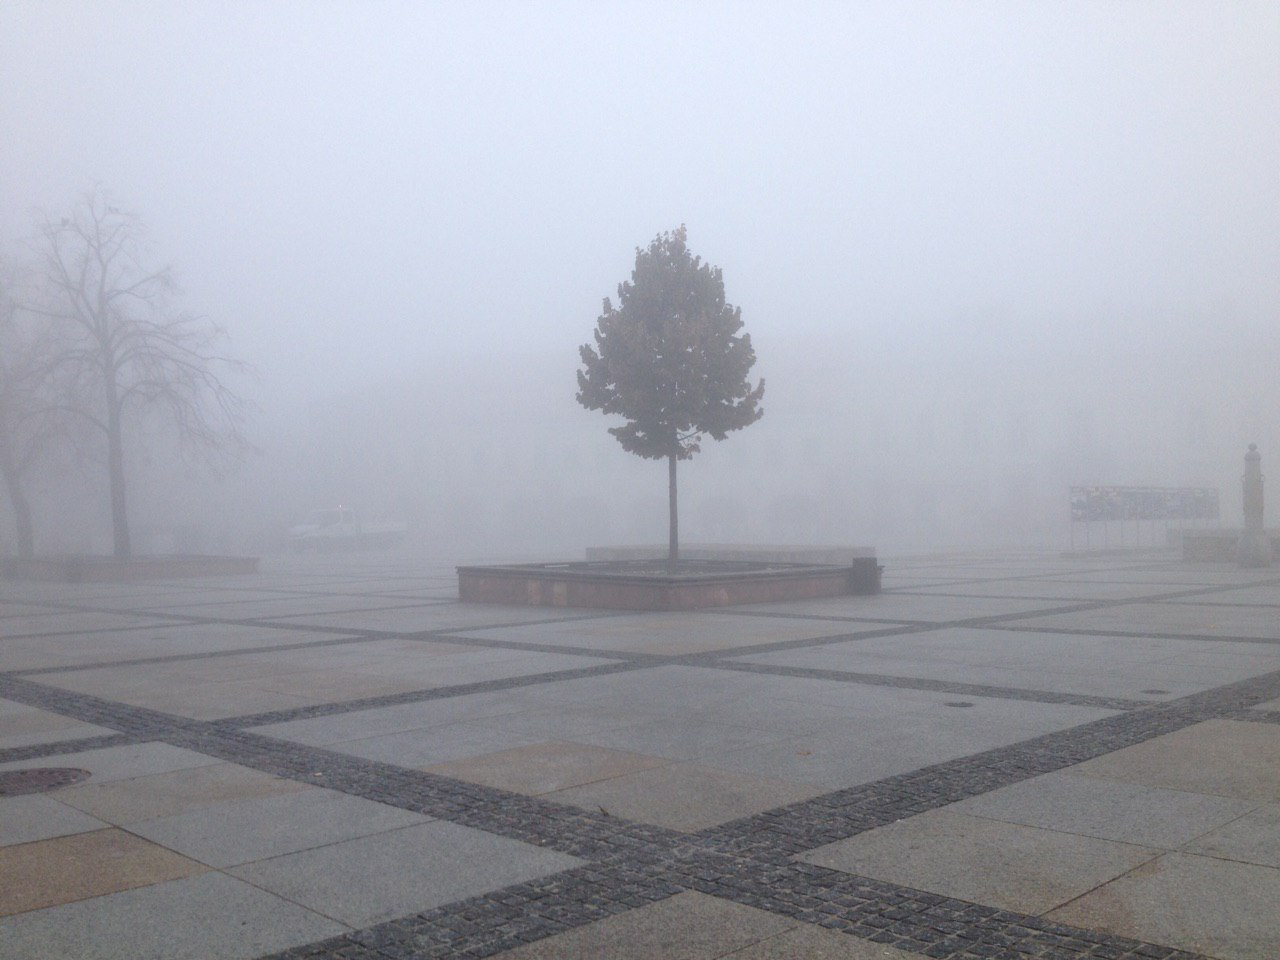

In [6]:
Image.fromarray(img.round().astype(np.uint8))

## Detecting edges in images

We will use a sobel-filter with our beloved convolution to detect the edgest of our image. First, let's have a look at the shape of our image:

![](https://www.learnopencv.com/wp-content/uploads/2017/11/convolution-example-matrix.gif)

From https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

In [7]:
img_norm.shape

(960, 1280, 3)

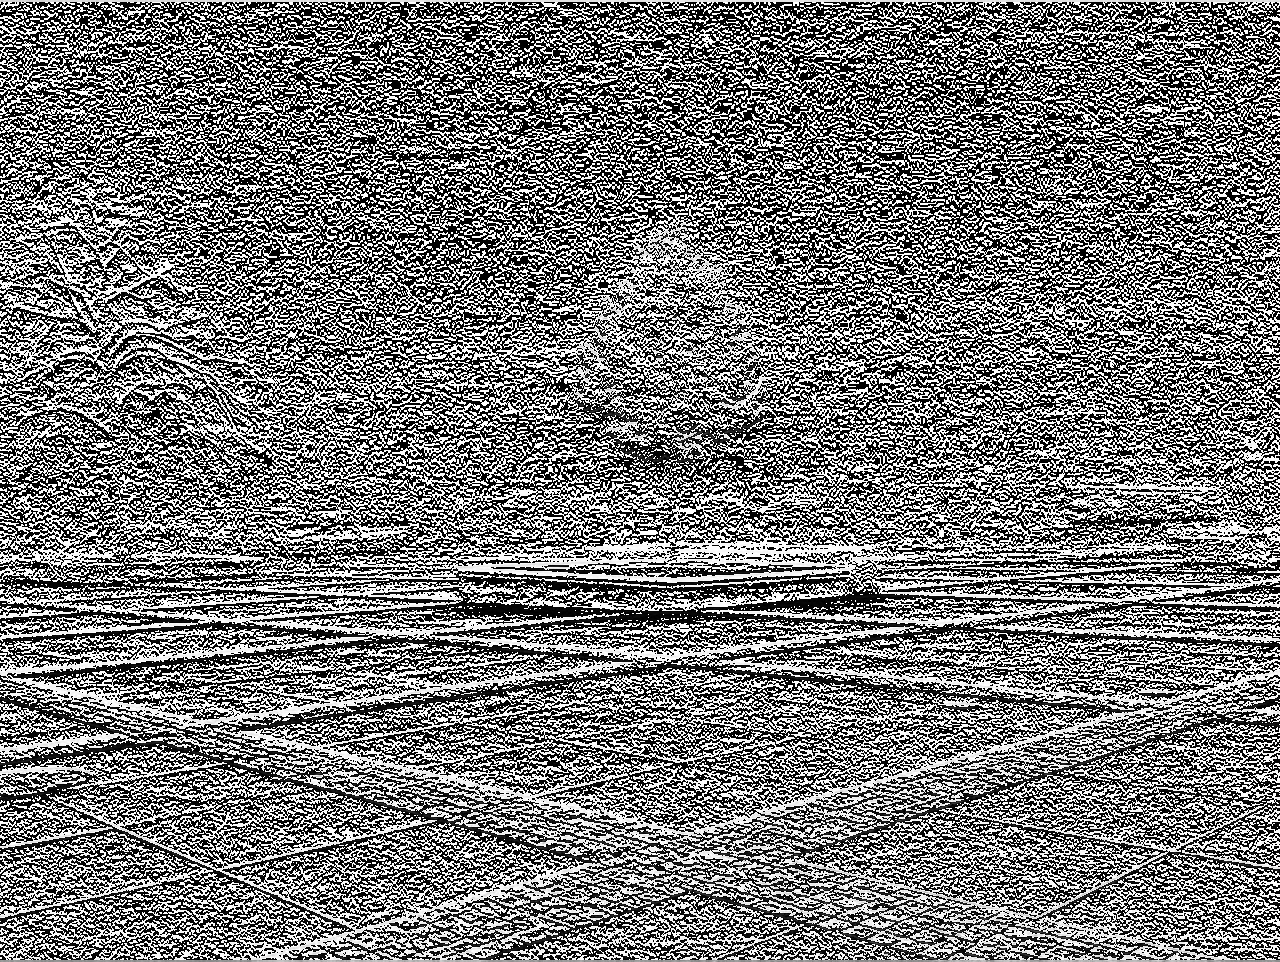

In [8]:
Image.fromarray(signal.convolve(img_norm[:,:,0], [[1.],[0],[-1.]]).round().astype(np.uint8))

In [ ]:
# Code from http://juanreyero.com/article/python/python-convolution.html
def common_size(a1, a2):
    """Chop-off the first rows and cols from the two numpy arrays a1
    and a2 so that they end up having the same size.
    >>> print common_size(np.array([[0, 0],
    ...                             [1, 2],
    ...                             [3, 4]]),
    ...                   np.array([[0, 5, 6],
    ...                             [0, 7, 8]]))
    (array([[1, 2],
           [3, 4]]), array([[5, 6],
           [7, 8]]))
    """
    (r1, c1) = a1.shape
    (r2, c2) = a2.shape
    return (a1[r1-r2 if r1>r2 else 0:,
               c1-c2 if c1>c2 else 0:],
            a2[r2-r1 if r2>r1 else 0::,
               c2-c1 if c2>c1 else 0:])

def gradient(im):
    imv, imh = common_size(signal.convolve(im, [[1., -1.]]),
                           signal.convolve(im, [[1.], [-1.]]))
    return np.sqrt(np.power(imv, 2)+np.power(imh, 2))

In [ ]:
Image.fromarray(gradient(img_norm[:,:,2]).astype(np.uint8))

##  Using libraries

In [9]:
from PIL import Image
from PIL import ImageFilter

# Create an image object
image = Image.open("img/tree.jpeg")
# Find the edges by applying the filter ImageFilter.FIND_EDGES
imageWithEdges = image.filter(ImageFilter.FIND_EDGES)

# Original image
image.show()
# Display the new image with edge detection done
imageWithEdges.show()

## Feature detection

### Theory of using CNNs

![](https://adeshpande3.github.io/assets/Cover.png)

## References and more examples

- [OpenCV - Open Source Computer Vision Library](https://opencv.org/)
- [OpenCV Python](https://pypi.org/project/opencv-python/)
- [OpenCV Github](https://github.com/opencv/opencv/)
- [Open Model Zoo repository](https://github.com/opencv/open_model_zoo/)
- [OpenVino](https://github.com/intel/ros2_openvino_toolkit)
- [OpenFrameworks - Creative coding in C++- good framework for using Kinect and depth cameras](https://openframeworks.cc/)
- [ofx github search - Contributed frameworks for openframeworks](https://github.com/search?utf8=%E2%9C%93&q=ofx)
- [Processing - Creative coding in Java](https://processing.org/)
- [P5 - Creative coding in Javascripts](https://p5js.org/)

### Image processing

- [Image magick](https://imagemagick.org/index.php)
- [Keras tutorial for CNN](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
- [Understanding CNNs - Part 1, 2 and 3](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)

### Video processing

- [FFMPEG](https://ffmpeg.org/)
- [ffmpeg-python: Python Bindings for ffmpeg](https://github.com/kkroening/ffmpeg-python)
- [YOLO - Object detection in video](https://pjreddie.com/)
- [Yolo V3 paper](https://pjreddie.com/media/files/papers/YOLOv3.pdf)
- https://github.com/intel/ros2_openvino_toolkit